# Try TRE, Mean squared error, phase cross correlation (phase shift), mutual information, and target registration error:
### All of the three (MSE,PS,MI) metrics in two different ways: ex. MSE for adjacent images (1 vs 2, 2 vs 3, etc) and MSE compared to the image of original reference (the middle image) (1  vs 17, 2 vs 17, etc).

### MSE: for each pixel, (ref_pixel-mov_pixel)^2

### PC offset from: https://docs.opencv.org/4.x/d7/df3/group__imgproc__motion.html#ga80e5c3de52f6bab3a7c1e60e89308e1b
### calculates detected phase correlation shift between two arrays.

### MI from: https://matthew-brett.github.io/teaching/mutual_information.html
### Calculates MI from equation MI = sum of joint probability(A,B) * log(joint probability(A,B)/marginal(A)*marginal(B))

### TRE from: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/68_Registration_Errors.html
### and https://arxiv.org/pdf/1912.13452.pdf

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [2]:
#local directory path: C:\Users\choke\Desktop\registered_images
#server path: \\fatherserverdw\Kevin\imageregistration\registered_images
img_files_path = [_ for _ in os.listdir(r'\\fatherserverdw\Kevin\imageregistration\registered_images') if _.endswith(".png")]
img_files_path_complete = [os.path.join(r'\\fatherserverdw\Kevin\imageregistration\registered_images', x) for x in img_files_path]
ref = int(len(img_files_path)/2) - 1 #idx = 16, or 17th image
# img_files_path[16] #'z0049_49C1.png' is the reference image

In [ ]:
# TRE:


In [3]:
# MSE comparing adjacent:
from sklearn.metrics import mean_squared_error
mse_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    img1 = np.array(Image.open(img_path_1))
    img2 = np.array(Image.open(img_path_2))
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    mse = mean_squared_error(img2_flatten,img1_flatten)
    mse_ra1.append(mse)
avg = sum(mse_ra1)/len(mse_ra1)
avg_mse1 = np.round(avg,2)
mse_ra1.append(None)
print("Averaged MSE for adjacent images is {}".format(avg_mse1))

Averaged MSE for adjacent images is 42.99


In [4]:
# MSE comparing to original reference image (one in the middle)
img_path_2 = img_files_path_complete[ref]
img2 = np.array(Image.open(img_path_2))
img2_flatten = img2.flatten()
mse_ra2 = []
for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    img1 = np.array(Image.open(img_path_1))
    img1_flatten = img1.flatten()
    mse = mean_squared_error(img2_flatten,img1_flatten)
    mse_ra2.append(mse)
avg = sum(mse_ra2)/len(mse_ra2)
avg_mse2 = np.round(avg,2)
print("Averaged MSE comparing to original image is {}".format(avg_mse2))

Averaged MSE comparing to original image is 48.53


In [5]:
# PC offset comparing adjacent:
from cv2 import phaseCorrelate, cvtColor

pc_offset1 = []
response_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    img1 = np.array(cv2.imread(img_path_1)).astype('float32')
    img2 = np.array(cv2.imread(img_path_2)).astype('float32')
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)
    pc_offset, response = phaseCorrelate(img1_g,img2_g)
    pc_offset1.append(pc_offset)
    response_ra1.append(response)
pc_offset1.append(None)


In [6]:
df_pc1 = pd.DataFrame(pc_offset1)
df_pc1.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc1 = np.absolute(df_pc1)
df_pc1

,Offset of X coordinates,Offset of Y coordinates
0,0.000725,0.000355
1,0.000497,0.007285
2,0.001321,0.003940
3,0.007351,0.003856
4,0.004477,0.000644
5,0.003643,0.006591
6,0.009836,0.011409
7,0.004966,0.002093
8,0.002840,0.002198
9,0.008562,0.006010


In [7]:
# PC offset comparing to original reference image (one in the middle):
img_path_2 = img_files_path_complete[ref]
img2 = np.array(Image.open(img_path_2)).astype('float32')
img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)

pc_offset2 = []
response_ra2 = []
for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    img1 = np.array(cv2.imread(img_path_1)).astype('float32')
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    pcc_shift, response = phaseCorrelate(img1_g,img2_g)
    pc_offset2.append(pcc_shift)
    response_ra2.append(response)

In [8]:
df_pc2 = pd.DataFrame(pc_offset2)
df_pc2.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc2 = np.absolute(df_pc2)
df_pc2

,Offset of X coordinates,Offset of Y coordinates
0,83.416607,1024.230358
1,22.878118,0.571115
2,122.387190,344.587666
3,214.612963,829.657196
4,1304.137438,267.208091
5,0.020616,0.019489
6,0.033221,0.895092
7,0.941214,0.219059
8,0.006761,0.013312
9,0.054864,0.024502


In [9]:
# Function to calculate MI:
def calculate_mutual_information(img_path_1,img_path_2): #order doesn't matter, MI(A,B) = MI(B,A)
    img1 = np.array(cv2.imread(img_path_1))
    img2 = np.array(cv2.imread(img_path_2))
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)
    # Image.fromarray(np.hstack((img1_g,img2_g))).show()
    # fig,axes = plt.subplots(1,2)
    # axes[0].hist(img1_g.ravel(), bins=20)
    # axes[0].set_title('Image 1 histogram')
    # axes[1].hist(img2_g.ravel(), bins=20)
    # axes[1].set_title('Image 2 histogram')
    # plt.show()
    corr = np.corrcoef(img1_g.ravel(),img2_g.ravel())[0,1]
    hist2d, x_edges, y_edges = np.histogram2d(img1_g.ravel(),img2_g.ravel(),bins=20)
    # plt.imshow(hist2d.T,origin='lower',cmap = "gray")
    # plt.xlabel('image1 signal bin')
    # plt.ylabel('image2 signal bin')
    # plt.title('2D Histogram between Image1 and Image2 with Cross Correlation Coefficient = {}'.format(corr))
    pxy = hist2d / float(np.sum(hist2d))
    px = np.sum(pxy, axis=1)  # marginal x over y
    py = np.sum(pxy, axis=0)  # marginal y over x
    px_py = px[:, None] * py[None, :]  # broadcast to multiply marginals

    # now we can do the calculation using the pxy, px_py 2D arrays
    nonzeros = pxy > 0  # filer out the zero values
    mi = np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))
    return mi

In [10]:
# MI for adjacent:
mi_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    mi = calculate_mutual_information(img_path_1,img_path_2)
    mi_ra1.append(mi)
mi_ra1.append(None)
print(mi_ra1)

[0.4849058314273125, 0.4162245967115682, 0.4321459057960573, 0.3663964914181318, 0.39283773082134227, 0.45622415960382073, 0.5830679398485484, 0.5769726495312383, 0.6343945106850402, 0.6189047776573369, 0.5896230332274913, 0.6019591257643095, 0.5994669954094823, 0.6036054816484573, 0.5390411701038564, 0.6018389780698216, 0.5864717706499663, 0.6313456680768316, 0.6167513410742206, 0.6167358382125928, 0.6246650053383919, 0.617783722684791, 0.6474665083469834, 0.6340809840068675, 0.6195376110145135, 0.6531493243339365, 0.6938635882447781, 0.7017938455432782, 0.7190972054973411, 0.6791819720686404, 0.6993394359130259, 0.7525253232108031, 0.8040443077654922, None]


In [11]:
# MI comparing to original reference image:
img_path_2 = img_files_path_complete[ref]
mi_ra2 = []

for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    mi = calculate_mutual_information(img_path_1,img_path_2)
    mi_ra2.append(mi)
print(mi_ra2)

[0.1764039393399049, 0.18352899248705767, 0.22781912866566953, 0.16392509779397826, 0.2449892051530869, 0.27517141753061486, 0.3766921772703031, 0.37212039628091165, 0.40006546257798925, 0.4027943086333005, 0.3980786291937331, 0.3910443103471421, 0.3869716770606927, 0.41493285091482823, 0.42689039898613823, 0.6018389780698216, 1.6528426580660232, 0.5864717706499663, 0.4828867039494923, 0.4785494237460075, 0.4528766333169171, 0.44194652567391957, 0.44282225135305353, 0.4360626540214203, 0.42770465077607955, 0.3863985481019138, 0.40120439929595114, 0.3976896405966903, 0.39846168365586043, 0.3887286138013822, 0.3717220540399554, 0.324917839245309, 0.3133268495115286, 0.3112174470906934]


In [12]:
#first concatenate all the arrays of the data and make them into a dataframe:
score_df = pd.DataFrame()
score_df["MSE adjacent"] = mse_ra1
score_df["MSE original"] = mse_ra2

df_pc1['mean'] = df_pc1.mean(axis=1)
df_pc1 = df_pc1.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])
df_pc2['mean'] = df_pc2.mean(axis=1)
df_pc2 = df_pc2.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])

score_df["PC mean offest adjacent"] = df_pc1 #average the X and Y offsets:
score_df["PC mean offset original"] = df_pc2
score_df["MI adjacent"] = mi_ra1
score_df["MI original"] = mi_ra2

import re
z_list = [re.findall("\d+",x)[0] for x in img_files_path]
z_values = [x.lstrip("0") for x in z_list]
score_df["z-values"] = z_values
score_df = score_df.set_index('z-values')
score_df = score_df.drop(labels='49',axis=0) #drop the reference image so that it doesn't screw up the normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_score_df = scaler.fit_transform(X=score_df,y=None)
scaled_score_df = pd.DataFrame(scaled_score_df, columns = score_df.columns, index = score_df.index)

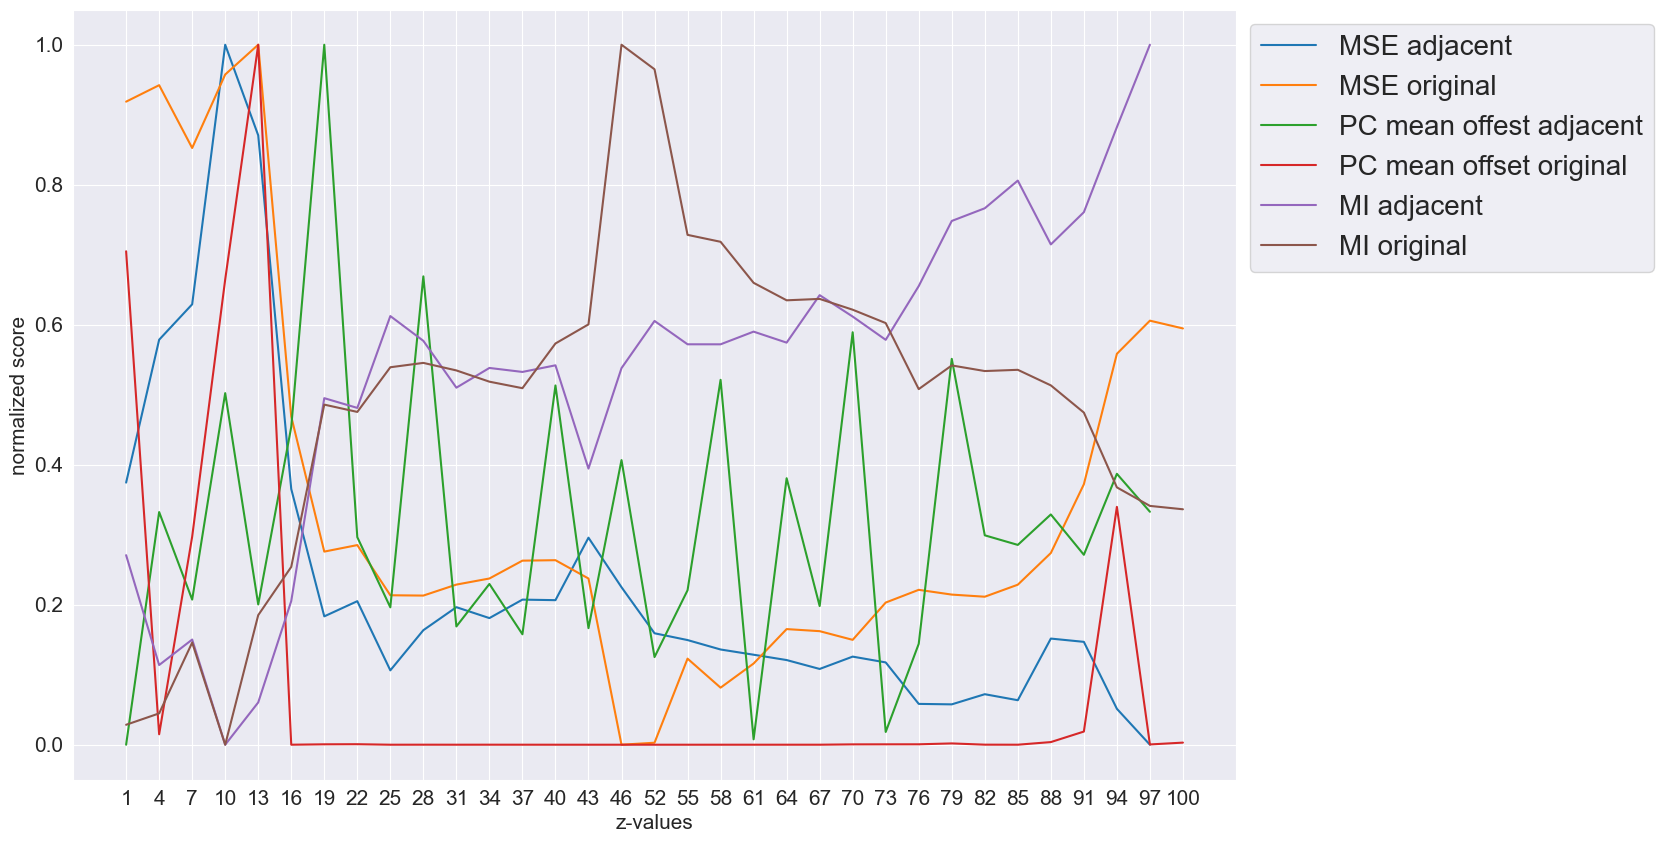

In [13]:
# then use sns.lineplot to plot all of these values, and their average in the same plot:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=scaled_score_df,dashes = False)
plt.ylabel('normalized score',fontsize=15)
plt.xlabel('z-values',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1, 1),fontsize = 20)

# fig.savefig(r'\\fatherserverdw\Kevin\imageregistration\score_figure.jpg',bbox_inches='tight')

### Make three plots: MSE, PC, MI, min-max normalization together (adjacent and original) (two lines in one plot)
### Make two more plots (normalize by its own value) of adjacent vs original (three lines in one plot)

In [14]:
mse_ra1 = [i for i in mse_ra1 if i is not None]
del mse_ra2[ref]
# max_val = np.max(np.maximum(mse_ra1,mse_ra2))
# min_val = np.min(np.minimum(mse_ra1,mse_ra2))

In [15]:
def MinMaxScaler(x):
    return [round((i - min(x)) / (max(x) - min(x)), 2) if i is not np.nan else np.nan for i in x ]

In [16]:
#join mse_ra1 and mse_ra2 as one array and apply normalize
mse_ra = np.array(mse_ra1 + mse_ra2)
norm_mse_ra = MinMaxScaler(mse_ra)

In [17]:
ra_length = len(norm_mse_ra)
ra_length = int(ra_length/2)
norm_mse_ra1 = norm_mse_ra[:ra_length]
norm_mse_ra2 = norm_mse_ra[ra_length:]
mse_dict = {'MSE Adjacent': norm_mse_ra1, 'MSE Origin': norm_mse_ra2}
mse_df = pd.DataFrame(mse_dict)
del(z_values[ref])
mse_df["z-values"] = z_values
mse_df = mse_df.set_index('z-values')

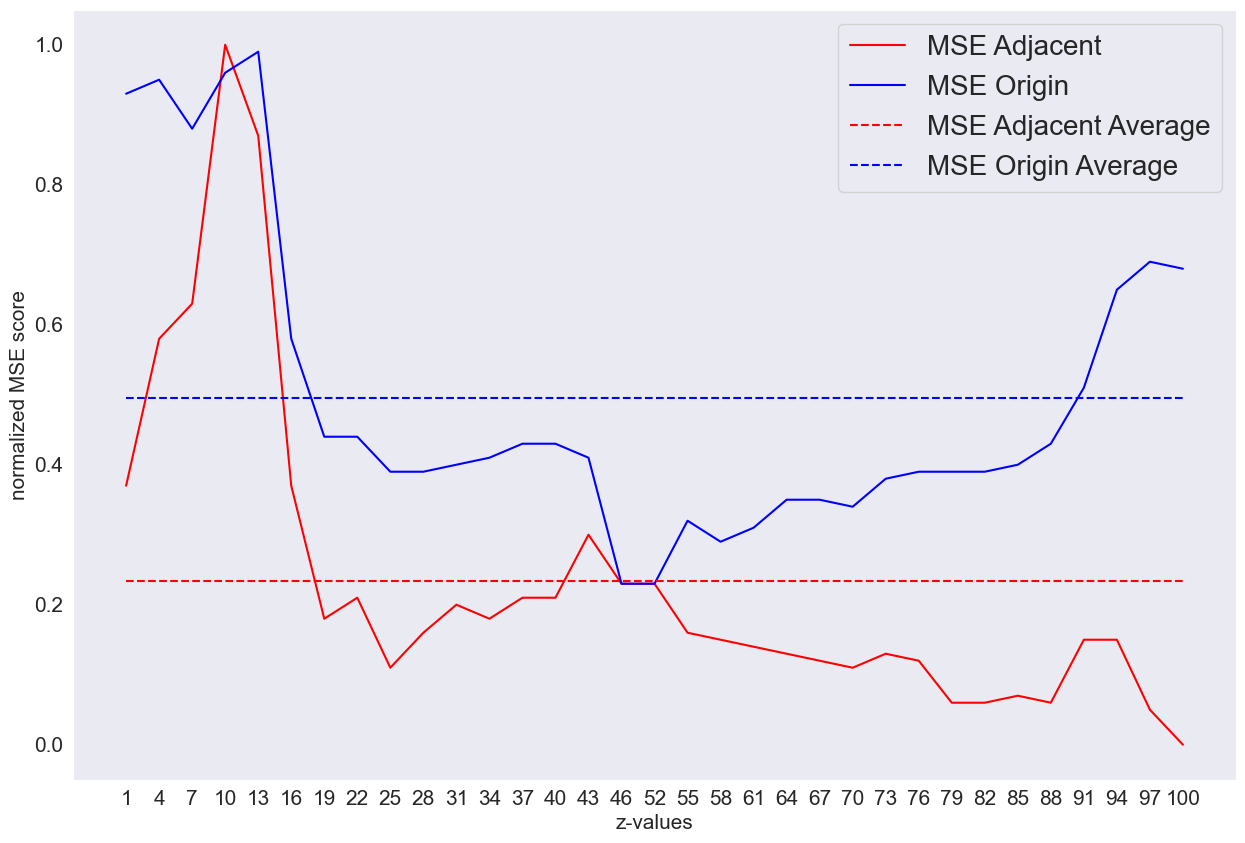

In [18]:
avg_norm_mse_ra1 = np.average(norm_mse_ra1)
avg_norm_mse_ra2 = np.average(norm_mse_ra2)
mse_avg1 = np.repeat(avg_norm_mse_ra1,len(z_values))
mse_avg2 = np.repeat(avg_norm_mse_ra2,len(z_values))
mse_df["MSE Adjacent Average"] = mse_avg1
mse_df["MSE Origin Average"] = mse_avg2

fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=mse_df,dashes = False, palette=['r', 'b', 'r', 'b'])
plt.ylabel('normalized MSE score',fontsize=15)
plt.xlabel('z-values',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
leg = ax.legend(loc='best',bbox_to_anchor=(1, 1),fontsize = 20)
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle("--")
leg_lines[2].set_linestyle("--")
ax.grid(False)
plt.show()
fig.savefig(r'\\fatherserverdw\Kevin\imageregistration\MSE_figure.jpg',bbox_inches='tight')

In [19]:
df_pc1 = pd.DataFrame(pc_offset1)
df_pc1.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc2 = pd.DataFrame(pc_offset2)
df_pc2.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc1 = np.absolute(df_pc1)
df_pc2 = np.absolute(df_pc2)
df_pc1['mean'] = df_pc1.mean(axis=1)
df_pc1 = df_pc1.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])
df_pc1 = df_pc1[df_pc1['mean'].notna()]
df_pc2['mean'] = df_pc2.mean(axis=1)
df_pc2 = df_pc2.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])

#drop values that have offset>1, but it doesn't apply to pc1, only pc2
df_pc2_dropped = df_pc2[df_pc2<0.05]

In [20]:
pc1_ra = df_pc1.values
pc1_ra = [num for elem in pc1_ra for num in elem]
pc2_ra = df_pc2_dropped.values
pc2_ra = [num for elem in pc2_ra for num in elem]
pc_ra = np.array(pc1_ra+pc2_ra)
norm_pc_ra = MinMaxScaler(pc_ra)
norm_pc_ra

[0.0,
 0.09,
 0.05,
 0.13,
 0.05,
 0.12,
 0.26,
 0.08,
 0.05,
 0.17,
 0.04,
 0.06,
 0.04,
 0.13,
 0.04,
 0.1,
 0.06,
 0.03,
 0.06,
 0.13,
 0.0,
 0.1,
 0.05,
 0.15,
 0.0,
 0.04,
 0.14,
 0.08,
 0.07,
 0.08,
 0.07,
 0.1,
 0.09,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.5,
 nan,
 nan,
 0.24,
 1.0,
 0.46,
 0.91,
 0.53,
 0.2,
 0.02,
 0.16,
 0.06,
 0.12,
 0.03,
 0.26,
 0.28,
 0.48,
 0.44,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.44,
 nan,
 nan,
 nan,
 nan,
 nan]

In [21]:
norm_pc_ra1 = norm_pc_ra[:ra_length]
norm_pc_ra2 = norm_pc_ra[ra_length:]
del(norm_pc_ra2[ref])
pc_dict = {'PC Adjacent': norm_pc_ra1, 'PC Origin': norm_pc_ra2}
pc_df = pd.DataFrame(pc_dict)
pc_df["z-values"] = z_values
pc_df = pc_df.set_index('z-values')

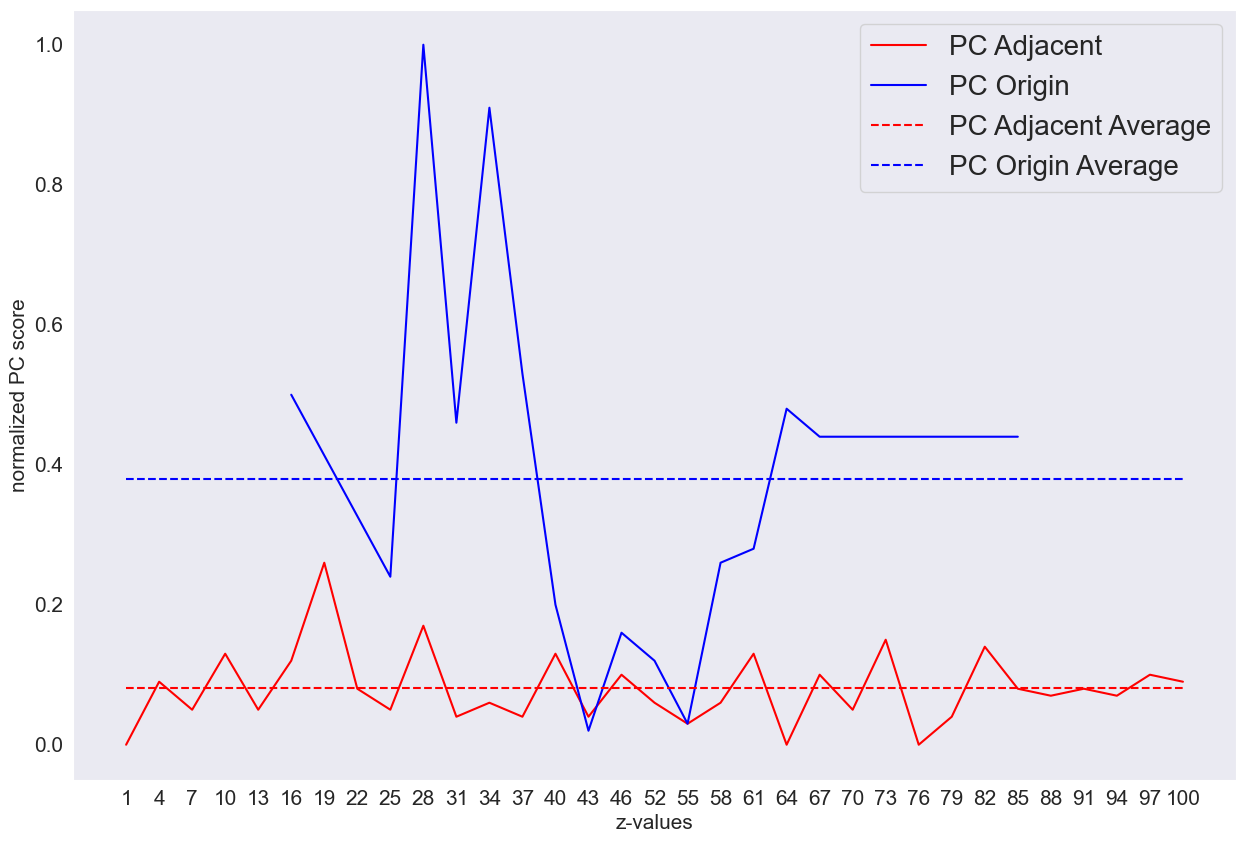

In [22]:
avg_norm_pc_ra1 = np.average(norm_pc_ra1)
avg_norm_pc_ra2 = np.nanmean(norm_pc_ra2)

pc_avg1 = np.repeat(avg_norm_pc_ra1,len(z_values))
pc_avg2 = np.repeat(avg_norm_pc_ra2,len(z_values))
pc_df["PC Adjacent Average"] = pc_avg1
pc_df["PC Origin Average"] = pc_avg2

fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=pc_df,dashes = False, palette=['r', 'b', 'r', 'b'])
plt.ylabel('normalized PC score',fontsize=15)
plt.xlabel('z-values',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
leg = ax.legend(loc='best',bbox_to_anchor=(1, 1),fontsize = 20)
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle("--")
leg_lines[2].set_linestyle("--")
ax.grid(False)
plt.show()
fig.savefig(r'\\fatherserverdw\Kevin\imageregistration\PC_figure.jpg',bbox_inches='tight')

In [23]:
mi_ra1 = [i for i in mi_ra1 if i is not None]
del mi_ra2[ref]

In [24]:
mi_ra = np.array(mi_ra1+mi_ra2)
norm_mi_ra = MinMaxScaler(mi_ra)
norm_mi_ra

[0.5,
 0.39,
 0.42,
 0.32,
 0.36,
 0.46,
 0.65,
 0.65,
 0.73,
 0.71,
 0.67,
 0.68,
 0.68,
 0.69,
 0.59,
 0.68,
 0.66,
 0.73,
 0.71,
 0.71,
 0.72,
 0.71,
 0.76,
 0.73,
 0.71,
 0.76,
 0.83,
 0.84,
 0.87,
 0.8,
 0.84,
 0.92,
 1.0,
 0.02,
 0.03,
 0.1,
 0.0,
 0.13,
 0.17,
 0.33,
 0.33,
 0.37,
 0.37,
 0.37,
 0.35,
 0.35,
 0.39,
 0.41,
 0.68,
 0.66,
 0.5,
 0.49,
 0.45,
 0.43,
 0.44,
 0.43,
 0.41,
 0.35,
 0.37,
 0.37,
 0.37,
 0.35,
 0.32,
 0.25,
 0.23,
 0.23]

In [25]:
norm_mi_ra1 = norm_mi_ra[:ra_length]
norm_mi_ra2 = norm_mi_ra[ra_length:]
mi_dict = {'MI Adjacent': norm_mi_ra1, 'MI Origin': norm_mi_ra2}
mi_df = pd.DataFrame(mi_dict)
mi_df["z-values"] = z_values
mi_df = mi_df.set_index('z-values')
mi_df

,MI Adjacent,MI Origin
z-values,,
1,0.50,0.02
4,0.39,0.03
7,0.42,0.10
10,0.32,0.00
13,0.36,0.13
16,0.46,0.17
19,0.65,0.33
22,0.65,0.33
25,0.73,0.37


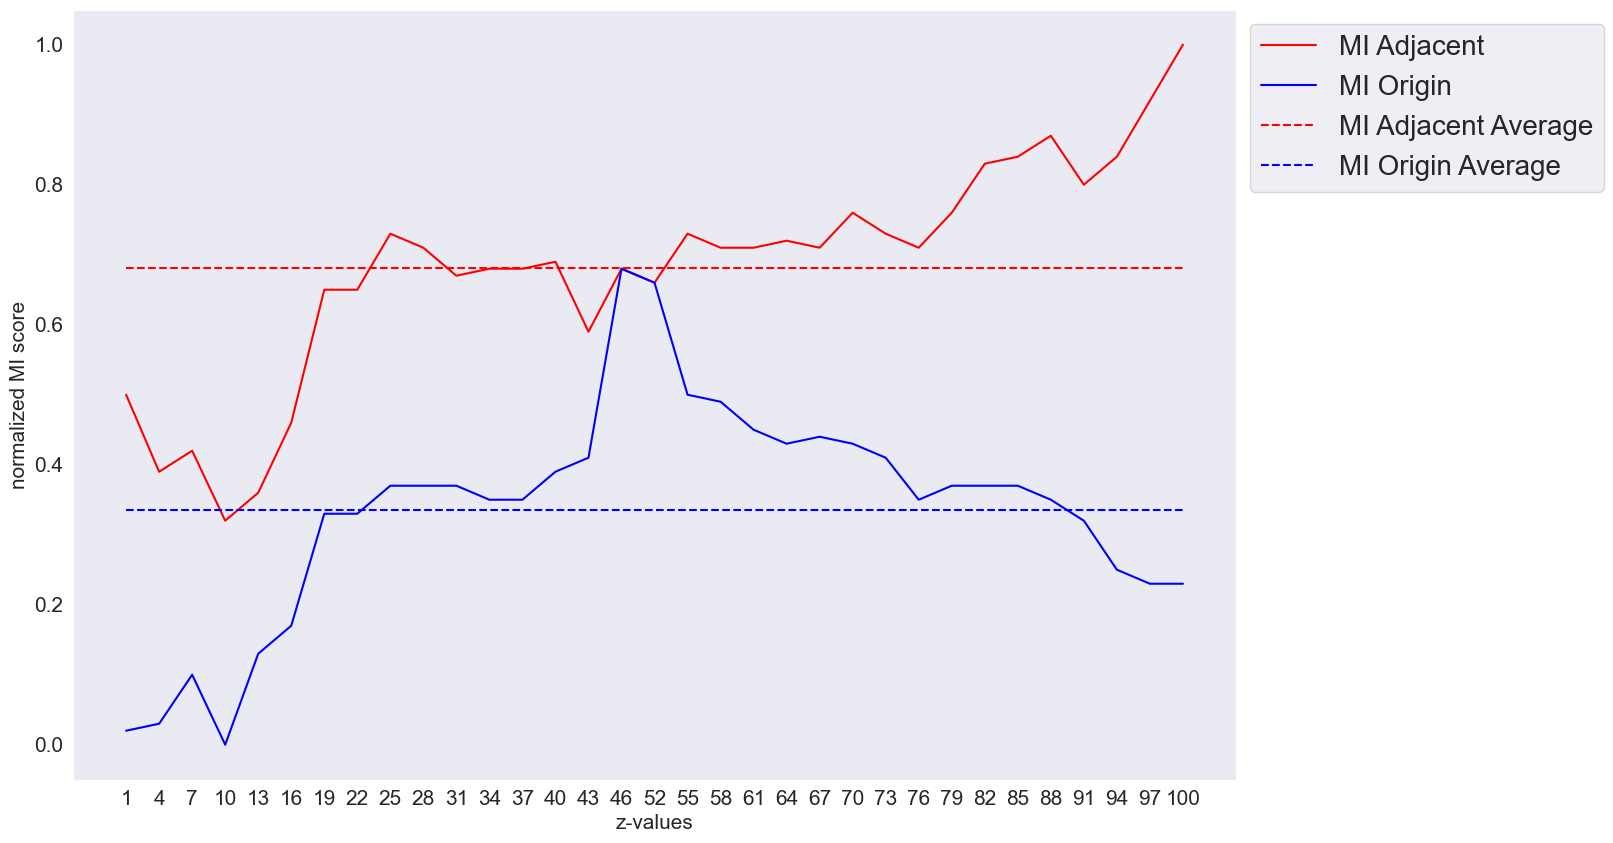

In [26]:
avg_norm_mi_ra1 = np.average(norm_mi_ra1)
avg_norm_mi_ra2 = np.average(norm_mi_ra2)

mi_avg1 = np.repeat(avg_norm_mi_ra1,len(z_values))
mi_avg2 = np.repeat(avg_norm_mi_ra2,len(z_values))
mi_df["MI Adjacent Average"] = mi_avg1
mi_df["MI Origin Average"] = mi_avg2
mi_df
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=mi_df,dashes = False, palette=['r', 'b', 'r', 'b'])
plt.ylabel('normalized MI score',fontsize=15)
plt.xlabel('z-values',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
leg = ax.legend(loc='best',bbox_to_anchor=(1, 1),fontsize = 20)
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle("--")
leg_lines[2].set_linestyle("--")
ax.grid(False)
plt.show()
fig.savefig(r'\\fatherserverdw\Kevin\imageregistration\MI_figure.jpg',bbox_inches='tight')